# Table of Contents
1. **Import the Dataset and Explore the Data**  
   1.1 [Importing Libraries](#1.1-Importing-Libraries)  
   1.2 [Importing the Datasets](#1.2-Importing-the-Datasets)  
   1.3 [Basic Information about the Datasets](#1.3-Basic-Information-about-the-Datasets)  
   1.4 [Descriptive Statistics](#1.4-Descriptive-Statistics)  
   1.5 [General Analysis of the Data Before Pre-Processing](#1.5-General-Analysis-of-the-Data-Before-Pre-Processing)  
   &nbsp;&nbsp;&nbsp;&nbsp; 1.5.1 [Outliers and Missing Values - Numerical Features](#1.5.1-Outliers-and-Missing-Values---Numerical-Features)  
   &nbsp;&nbsp;&nbsp;&nbsp; 1.5.2 [Missing Values and Rare Values - Categorical Features](#1.5.2-Missing-Values-and-Rare-Values---Categorical-Features)  
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.5.2.1 [Missing Values of Datetime and Categorical Features](#1.5.2.1-Missing-Values-of-Datetime-and-Categorical-Features)  
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.5.2.3 [Rare Values of Datetime](#1.5.2.3-Rare-Values-of-Datetime)  
1.6 [Exploring Data Visually](#1.6-Exploring-Data-Visually)  
1.7 [Analyzing Multivariate Relationships](#1.7-Analyzing-Multivariate-Relationships)  
1.8 [Correlation Between Categorical Variables](#1.8-Correlation-Between-Categorical-Variables)  

# 1. Import the dataset and explore the data

## **1.1 Importing libraries**

In [34]:
# Standard libraries
import numpy as np
import pandas as pd
import warnings
import zipfile, io

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Statistical libraries
import scipy.stats as ss
from scipy import stats
from scipy.stats import f_oneway
from scipy.sparse import csr_matrix

# Scikit-learn preprocessing and model selection
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Scikit-learn feature selection
from sklearn.feature_selection import f_classif, SelectKBest, mutual_info_classif, RFE, RFECV

# Scikit-learn models
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Scikit-learn metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report

# IPython display
from IPython.display import display

# Seaborn settings
sns.set()

# Ignore warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

## **1.2 Importing the datasets**

In [35]:
# extract the project data zip file
z = zipfile.ZipFile('project_data.zip')
z.extractall()

del z

In [36]:
# load the data (train and test)
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

## **1.3 Basic Information about the Datasets**

In [37]:
# display the first 3 rows of the training DataFrame to inspect its structure and values
df_train.head(3) 

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   

     C-3 Date                  Carrier Name  ... WCIO Cause of Injury Code  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  ...                      27.0   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  ...                      97.0   
2         NaN     INDEMNITY INSURANCE CO OF  ...                      79.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0      FROM LIQUID OR GREASE SPILLS                       10.0   
1                 REPETITIVE MOTION                       49.0   
2    OBJECT BEING LIFTED OR HANDLED                        7.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   62.0   
1                    SPRAIN OR TEAR                   38.0   
2                        CONCUSSION                   10.0   

  WCIO Part Of Body Description Zip Code Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662               0.0  Not Work Related   
1                   SHOULDER(S)    14569               1.0  Not Work Related   
2          MULTIPLE HEAD INJURY    12589               0.0  Not Work Related   

   Number of Dependents  
0                   1.0  
1                   4.0  
2                   6.0  

[3 rows x 33 columns]

In [38]:
# display a concise summary of the training DataFrame, including column names, non-null counts, and data types
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

`INPUT VARIABLES`: numerical and categorical <br>
`OUTPUT VARIABLE`: categorical <br>

__GOAL__: Predict Claim Injury Type

**Multiclass Classification Problem**

## **1.4 Descriptive Statistics**

In [39]:
# Count the number of duplicates
num_duplicates = df_train.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 0


In [40]:
# Generate descriptive statistics for all columns in the DataFrame, including non-numeric columns
# Transpose the result for better readability
df_train.describe(include='all').T

count unique  \
Accident Date                         570337   5539   
Age at Injury                       574026.0    NaN   
Alternative Dispute Resolution        574026      3   
Assembly Date                         593471   1096   
Attorney/Representative               574026      2   
Average Weekly Wage                 545375.0    NaN   
Birth Year                          544948.0    NaN   
C-2 Date                              559466   2475   
C-3 Date                              187245   1648   
Carrier Name                          574026   2046   
Carrier Type                          574026      8   
Claim Identifier                    593471.0    NaN   
Claim Injury Type                     574026      8   
County of Injury                      574026     63   
COVID-19 Indicator                    574026      2   
District Name                         574026      8   
First Hearing Date                    150798   1094   
Gender                                574026      4   
IME-4 Count                         132803.0    NaN   
Industry Code                       564068.0    NaN   
Industry Code Description             564068     20   
Medical Fee Region                    574026      5   
OIICS Nature of Injury Description       0.0    NaN   
WCIO Cause of Injury Code           558386.0    NaN   
WCIO Cause of Injury Description      558386     74   
WCIO Nature of Injury Code          558369.0    NaN   
WCIO Nature of Injury Description     558369     56   
WCIO Part Of Body Code              556944.0    NaN   
WCIO Part Of Body Description         556944     54   
Zip Code                              545389  10060   
Agreement Reached                   574026.0    NaN   
WCB Decision                          574026      1   
Number of Dependents                574026.0    NaN   

                                                                  top    freq  \
Accident Date                                              2020-03-01    1245   
Age at Injury                                                     NaN     NaN   
Alternative Dispute Resolution                                      N  571412   
Assembly Date                                              2020-03-06    1422   
Attorney/Representative                                             N  392291   
Average Weekly Wage                                               NaN     NaN   
Birth Year                                                        NaN     NaN   
C-2 Date                                                   2021-05-11    1847   
C-3 Date                                                   2021-04-21     350   
Carrier Name                                     STATE INSURANCE FUND  111144   
Carrier Type                                              1A. PRIVATE  285368   
Claim Identifier                                                  NaN     NaN   
Claim Injury Type                                         2. NON-COMP  291078   
County of Injury                                              SUFFOLK   60430   
COVID-19 Indicator                                                  N  546505   
District Name                                                     NYC  270779   
First Hearing Date                                         2022-04-15     440   
Gender                                                              M  335218   
IME-4 Count                                                       NaN     NaN   
Industry Code                                                     NaN     NaN   
Industry Code Description           HEALTH CARE AND SOCIAL ASSISTANCE  114339   
Medical Fee Region                                                 IV  265981   
OIICS Nature of Injury Description                                NaN     NaN   
WCIO Cause of Injury Code                                         NaN     NaN   
WCIO Cause of Injury Description                              LIFTING   46610   
WCIO Nature of Injury Code                                    

- It seems that the variable OIICS Nature of Injury Description has 0 records
- Many variables have missing values

## **1.5 General analysis of the data before pre-processing**

## 1.5.1 Ouliers and Missing Values - Numerical Features

In [41]:
# Selecting columns with numeric data types (float64 and int64) to focus the analysis on numerical features. 
#A copy is created to preserve the original dataset.
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df_train[numeric_columns].copy()  # Criar uma cópia das colunas numéricas

#Filtering numeric columns to exclude those with only one unique value, as these columns do not contribute useful variability for analysis.
valid_numeric_columns = [col for col in numeric_columns if numeric_data[col].nunique() > 1]

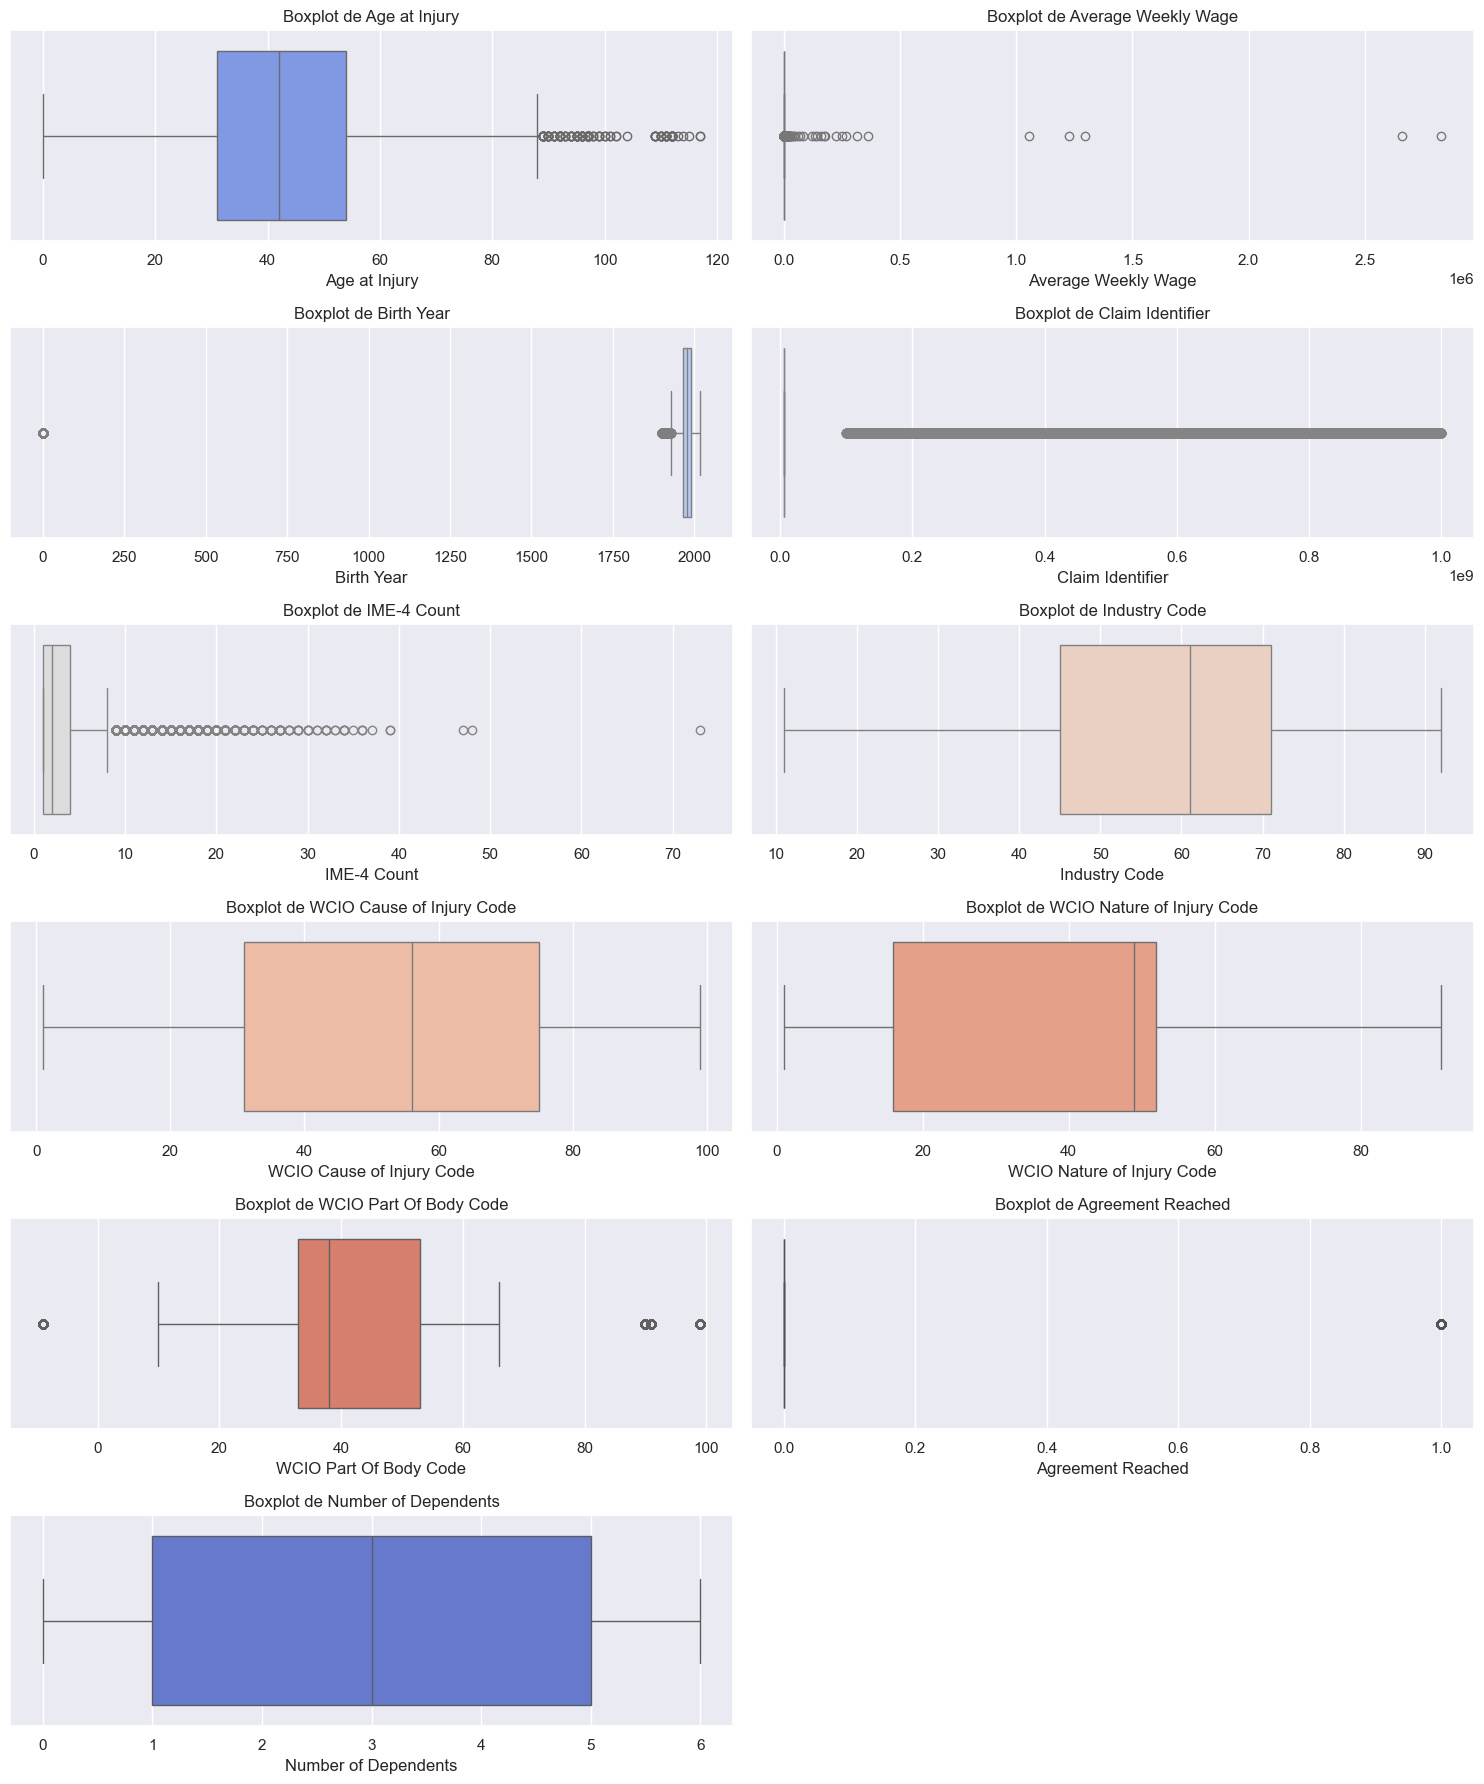

In [42]:
# Generating boxplots for each valid numeric column to visualize the distribution and identify potential outliers.
num_cols = len(valid_numeric_columns)
rows = (num_cols // 2) + (num_cols % 2)  

palette = sns.color_palette("coolwarm", num_cols)

plt.figure(figsize=(15, rows * 3))

# Using plt.tight_layout() to prevent overlapping of subplots and ensure clear visualization.
for i, col in enumerate(valid_numeric_columns, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(data=numeric_data, x=col, color=palette[i % len(palette)])  
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

### Analysis of Boxplots
The boxplots reveal **important insights** into the numerical features of the dataset:
- **Age at Injury:** The data is fairly concentrated around the median, but there are significant outliers, suggesting variability in extreme cases.
- **Average Weekly Wage:** Shows a heavily skewed distribution with a few extreme outliers, likely high earners, impacting the spread.
- **Birth Year:** Data is mostly consistent, but a few outliers represent invalid or unusual birth years that may need further investigation.
- **Claim Identifier:** Appears to be a categorical or ID variable with no meaningful spread, confirming its role as an identifier.
- **IME-4 Count:** A right-skewed distribution with potential outliers, indicating cases with unusually high counts.
- **Industry Code and WCIO Codes:** These variables show minimal spread and mostly consistent distributions, suggesting limited variability within these categories.
- **Number of Dependents:** Presents a well-distributed variable with moderate variability and no extreme outliers.

In [43]:
#Creating an empty dictionary to store information about missing values for each numeric column.
missing_info = {}

#Calculating the total number of missing values and their percentage for each numeric column. 
#This information is stored in the missing_info dictionary for analysis.
for col in numeric_columns:
    total_missing = df_train[col].isnull().sum()
    percent_missing = (total_missing / len(df_train)) * 100
    missing_info[col] = {
        "Total Missing": total_missing,
        "Percentual de Missing (%)": percent_missing
    }


missing_df = pd.DataFrame(missing_info).T
display(missing_df.style.background_gradient(cmap="coolwarm"))

### Overall Missing Values:
* Most features have relatively low percentages of missing data (under 10%), except for a few that stand out with significant missingness.

***Key Features with High Missingness:***

- **IME-4 Count:** 77.62% of this column's values are missing, indicating a major issue that may require further investigation. This column may not be reliable for analysis without proper handling.

- **OIICS Nature of Injury Description:** 100% missing values make this feature completely unusable in its current state unless it can be reconstructed or filled from external sources.

***Moderate Missingness:***

- **Average Weekly Wage (8.10%) and Birth Year (8.18%):** These features have moderate missingness. Depending on their importance in the analysis, appropriate imputation strategies can be applied.

***Low Missingness:***
- Features such as **Age at Injury** (3.27%), **Industry Code** (4.95%), and **WCIO Codes** (5-6%) have low missingness, which can likely be managed with simple imputation methods or removal of missing rows.

***No Missingness:***
- **Claim Identifier:** This column has no missing values, which is expected as it might be an identifier. It indicates data completeness for this feature.

## 1.5.2 Missing Values and Rare Values -> Categorical Features

**1.5.2.1 Missing Values of Datetime and Categorical features**

In [44]:
#Creating a copy of the original dataset to ensure the original data remains unchanged during processing.
df_train_copy = df_train.copy()

# Listing the columns containing date information to handle them separately and convert them to a datetime format.
date_columns = ['Accident Date', 'C-2 Date', 'C-3 Date', 'Assembly Date', 'Birth Year', 'First Hearing Date']
df_dates = df_train_copy[date_columns].copy()  

#sing pd.to_datetime to convert the selected date columns into a datetime format. Errors are coerced to handle invalid date values.
for col in date_columns:
    df_dates[col] = pd.to_datetime(df_dates[col], errors='coerce')  
#Selecting columns with the object data type to identify categorical variables for further analysis.
categorical_columns = df_train_copy.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in date_columns]

print("Categorical (without dates):")
print(categorical_columns)

#Calculating the number of missing values in categorical columns to assess data quality and completeness.
missing_categoricals = df_train_copy[categorical_columns].isnull().sum()
print("\nValues of missing values at categorical:")
print(missing_categoricals[missing_categoricals > 0])

#Calculating the number of missing values in date columns to identify gaps in temporal data.
missing_dates = df_dates.isnull().sum()
print("\nValues of missing values at date:")
print(missing_dates[missing_dates > 0])

Categorical (without dates):
['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision']

Values of missing values at categorical:
Alternative Dispute Resolution       19445
Attorney/Representative              19445
Carrier Name                         19445
Carrier Type                         19445
Claim Injury Type                    19445
County of Injury                     19445
COVID-19 Indicator                   19445
District Name                        19445
Gender                               19445
Industry Code Description            29403
Medical Fee Region                   19445
WCIO Cause of Injury Description     35085
WCIO Nature of Injury Description    35102
W

### Conclusions:
**Categorical Variables:**
- Several categorical variables (e.g., "Alternative Dispute Resolution," "Carrier Name," "Gender") have the same number of missing values (19,445), suggesting a shared issue or dependency in data collection for these fields.

- Variables such as "Zip Code" and "WCIO Cause of Injury Description" exhibit moderate missingness, potentially requiring imputation or exclusion depending on their importance.

**Date Variables:**
- Missing data in date columns like "C-3 Date" (over 400,000 missing values) and "First Hearing Date" indicate significant gaps in temporal information. These columns may require deeper analysis or imputation.

- Data Integrity:
Variables with high missingness (e.g., "C-3 Date") might introduce bias if not addressed, while those with lower missingness can likely be managed with standard imputation techniques.

**Potential Next Steps:**
- Investigate dependencies between missing categorical variables.
- Consider removing columns with excessively high missing values if they are not critical to the analysis.
- Apply tailored imputation strategies for date and categorical columns with moderate levels of missingness.

**1.5.2.2 Rare Values for Categorical**

In [45]:
# Define the threshold for rare values (e.g., 1%)
threshold = 0.01  

# Create a list to store the summary of rare values
rare_values_summary = []

# Analyze categorical columns (excluding date columns)
for col in categorical_columns:
    # Calculate relative frequencies
    category_counts = df_train[col].value_counts(normalize=True)  
    # Filter rare values based on threshold
    rare_categories = category_counts[category_counts < threshold]  
    
    # Append results to the summary list
    for category, frequency in rare_categories.items():
        rare_values_summary.append({
            'Column': col,
            'Rare Value': category,
            'Frequency (%)': frequency * 100,
            'Type': 'Categorical'
        })

# Create a DataFrame with the rare values
rare_values_df = pd.DataFrame(rare_values_summary)

# Sort the DataFrame by frequency in descending order only until 0.7%
rare_values_df = rare_values_df.sort_values(by='Frequency (%)', ascending=False).head(30)

# Improve visualization with a gradient 
print("Rare values at categorical features:")
display(rare_values_df.style.background_gradient(cmap="coolwarm"))

Rare values at categorical features:


In [46]:
#Display only the top 5 rarest values for each variable to simplify the output
# Group by column and select the first 5 rows for each group
top_rare_values_df = rare_values_df.groupby('Column').head(5)
print("Top 5 rare values per categorical column:")
display(top_rare_values_df.style.background_gradient(cmap="coolwarm"))

Top 5 rare values per categorical column:


### Conclusion:
- The analysis reveals that several categorical variables contain rare values with extremely low frequencies, often below 1%. These include variables such as WCIO Nature of Injury Description, Carrier Name, County of Injury, and Zip Code.

**These rare values may represent:**
- **Outliers or Unique Cases:**
Examples like "INSUFFICIENT INFO TO PROPERLY IDENTIFY" or very specific injury descriptions (e.g., "CARPAL TUNNEL SYNDROME") suggest that some values could be noise or highly specific cases.

- **High Dimensionality:**
Variables like Carrier Name and WCIO Cause of Injury Description exhibit many unique values, which may complicate modeling or analysis due to sparsity.

- **Data Cleaning Needs:**
Rare values in categories such as "UNKNOWN" or "UNCLASSIFIED" may require grouping or exclusion to avoid unnecessary complexity.

**1.5.2.3 Rare Values of Datetime**

**Per year**

In [47]:
#Creating an empty list to store the summary of rare values in date columns, grouped by year.
rare_values_summary_dates = []

# Looping through each date column to analyze rare years based on their frequency.
for col in date_columns:
    # Converting columns to datetime format to extract year values accurately. Errors are coerced to handle invalid date formats.
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    
    # Filtering years with frequencies below the defined threshold, identifying them as rare.
    year_counts = df_train[col].dt.year.value_counts(normalize=True)  
    rare_years = year_counts[year_counts < threshold] 
    for year, frequency in rare_years.items():
        rare_values_summary_dates.append({
            'Column': col, 
            'Year': year, 
            'Frequency (%)': frequency * 100,
            'Type': 'Year'
        })

# Converting the list of rare year values into a DataFrame for structured analysis and visualization.
rare_dates_df = pd.DataFrame(rare_values_summary_dates)

# Sorting the rare year values by frequency in descending order for easier interpretation.
rare_dates_df = rare_dates_df.sort_values(by='Frequency (%)', ascending=False).head(30)

print("Rare values at datetime (group by year):")
display(rare_dates_df.style.background_gradient(cmap="coolwarm"))

Rare values at datetime (group by year):


In [48]:
# Show only the top 5 rarest years for each column
top_rare_years_df = rare_dates_df.groupby('Column').head(5)

# Convert 'Year' column to integers
top_rare_years_df['Year'] = top_rare_years_df['Year'].astype(int)

# Display with updated formatting
display(top_rare_years_df.style.background_gradient(cmap="coolwarm"))

### Conclusions:
- **Distribution of Rare Years:** The analysis identified rare years in several date columns, such as C-2 Date, C-3 Date, and Accident Date. These years exhibit extremely low frequencies, indicating uncommon occurrences in the dataset.

- **Notable Occurrences:** Recent years, such as 2023 and 2024, appear as rare in some columns, suggesting that data related to these years might be incomplete or limited in the current dataset.

- **Historical Trends:** Years such as 2000 or 2001 also appear with low frequencies, which may be expected if the dataset has a higher concentration of data from more recent periods.

- **Data Quality:** The presence of rare years may indicate gaps or inconsistencies in data collection during certain periods, which could require further verification.

## **1.6 Exploring data visually**

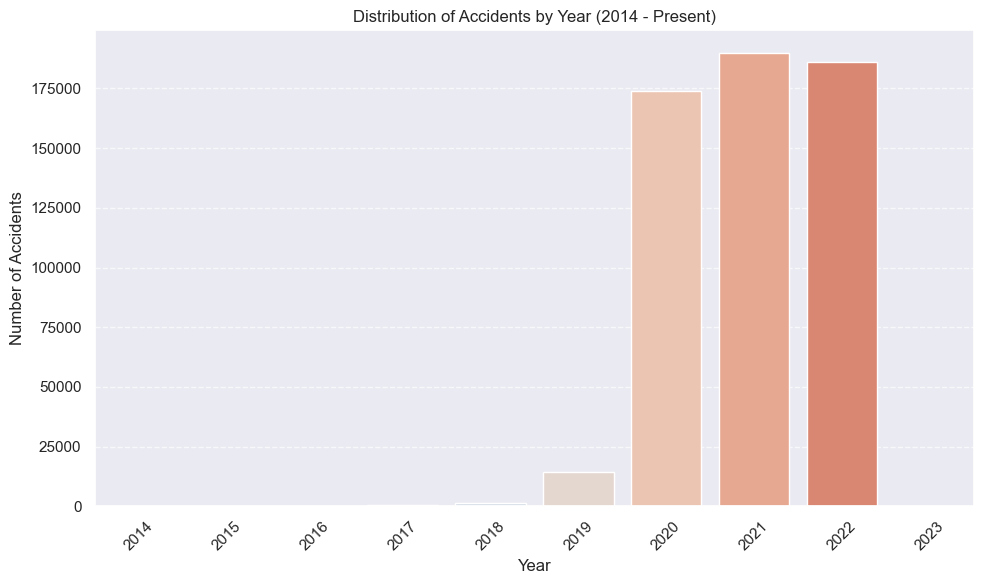

In [49]:
# Ensure 'Accident Date' is in datetime format without modifying df_train permanently
df_train_temp = df_train.copy()
df_train_temp['Accident Date'] = pd.to_datetime(df_train_temp['Accident Date'], errors='coerce')

# Count occurrences of 'Accident Year' from 2014 onward
accident_year_counts = df_train_temp[df_train_temp['Accident Date'].dt.year >= 2014]['Accident Date'].dt.year.value_counts().sort_index()

# Plot accident occurrences by year using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=accident_year_counts.index, y=accident_year_counts.values, palette='coolwarm')
plt.title("Distribution of Accidents by Year (2014 - Present)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Conclusion:

- **Distribution of Accidents by Year:**
Most of the accidents registered on our dataset occurred in 2020, 2021, 2022. Therefore, most of what our model is going to learn to make predictions will be from the data in 2020, 2021, 2022.
- **Taking a closer look at Accident Occurrences:**
By Month for Each Year, there’s a noticeable drop in the number of accidents in between month three and five. If we consider major events during this period, this drop seems to be justified by the Covid-19 Pandemic, when most people were not allowed to leave their home, and therefore the work related accidents were less likely.

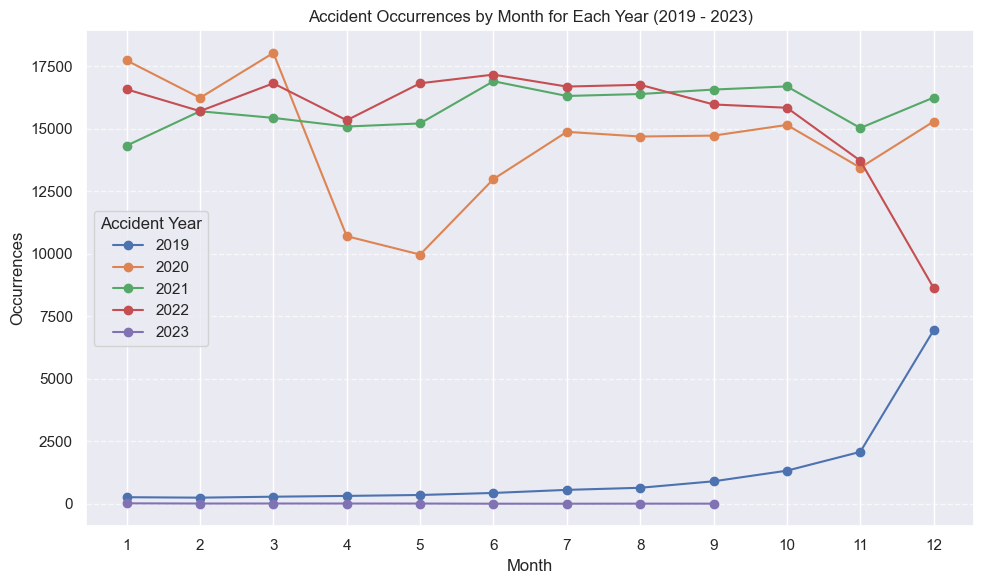

In [50]:
# Define the range of years we want to plot
target_years = range(2019, 2024)
# Prepare the figure
plt.figure(figsize=(10, 6))

# Loop over each year in the target range and plot monthly occurrences
for year in target_years:
    # Filter data for the specific year and count occurrences by month
    month_counts = df_train_temp[df_train_temp['Accident Date'].dt.year == year]['Accident Date'].dt.month.value_counts().sort_index()
    
    # Plot occurrences for each month in the year
    plt.plot(month_counts.index, month_counts.values, marker='o', label=f'{year}')

# Set titles and labels
plt.title('Accident Occurrences by Month for Each Year (2019 - 2023)')
plt.xlabel('Month')
plt.ylabel('Occurrences')
plt.xticks(range(1, 13))  # Display months from 1 to 12
plt.legend(title='Accident Year') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

### Conclusions:

**Overall Trend by Year:**

- The analysis shows significant variations in the number of accident occurrences across months for each year from 2019 to 2023.

- 2020 exhibits a sharp drop in occurrences between March and June, likely due to the impact of the COVID-19 pandemic, which disrupted activities across various industries and reduced travel.

- Seasonality:
The years 2021, 2022, and 2019 show a more stable distribution with minor fluctuations throughout the months.
There is a slight increase in accident occurrences during the final months (October to December), suggesting potential seasonality factors such as weather changes or increased year-end activity.

- Year 2023:
2023 consistently shows lower occurrences compared to other years, which may indicate incomplete data for this year or that the year was still ongoing during data collection.

- Year-to-Year Comparison:
The 2020 line is clearly an outlier, highlighting an anomaly in accident patterns likely caused by external factors (e.g., the pandemic).
Other years exhibit relatively consistent patterns, especially from March to October.

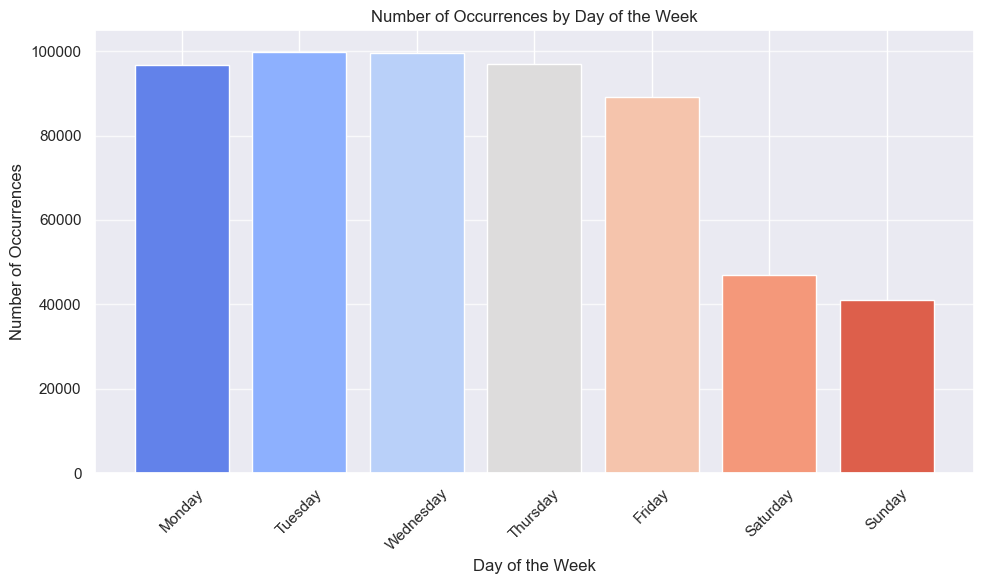

In [51]:
# Define the order of days for consistent ordering on the x-axis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count occurrences by day of the week directly from 'Accident Date' without modifying the original DataFrame
day_of_week_counts = df_train_temp['Accident Date'].dropna().dt.day_name().value_counts().reindex(day_order)

# Set up color palette
colors = sns.color_palette("coolwarm", len(day_order))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_counts.index, day_of_week_counts.values, color=colors)
plt.title('Number of Occurrences by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


### Conclusion:

- **Weekday Distribution:**
The number of occurrences is highest from **Monday to Thursday**, with relatively consistent numbers across these weekdays.
There is a noticeable decline starting on Friday, which continues through the **weekend** (Saturday and Sunday).

- **Weekend Drop:**
The significant reduction in occurrences on Saturday and Sunday suggests that activities or events associated with the data being analyzed are less frequent during the weekend. This could indicate operational shutdowns, reduced workloads, or fewer people involved in relevant activities.

- **Pattern Insight:**
The data suggests a strong weekday-oriented pattern, with the majority of occurrences concentrated on working days (Monday to Friday).

- **Potential Explanation:**
This pattern may be typical in datasets related to workplace incidents, administrative events, or industrial activities that predominantly occur during regular business days.

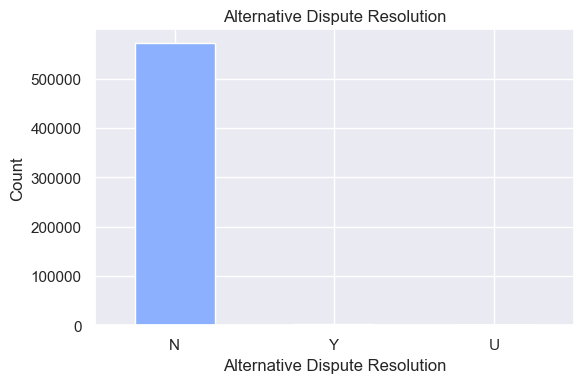

In [52]:
# Count occurrences of 'Alternative Dispute Resolution' without modifying the original DataFrame
attorney_counts = df_train_temp["Alternative Dispute Resolution"].value_counts()

colors = sns.color_palette("coolwarm", len(attorney_counts))

plt.figure(figsize=(6, 4))
attorney_counts.plot(kind='bar', color=colors)
plt.title('Alternative Dispute Resolution')
plt.xlabel('Alternative Dispute Resolution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


### Conclusion: 
- Regarding the execution of Alternative Dispute Resolutions, it did not occur for more than 95% of the dataset entries.
- Due to the high class imbalance of this feature, it will most likely not have a significant influence on the target variable, so the model will not learn much from it.


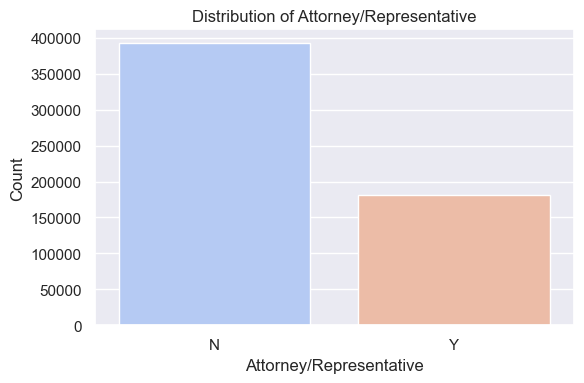

In [53]:
# Bar plot for 'Attorney/Representative'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train_temp, x='Attorney/Representative', order=df_train_temp['Attorney/Representative'].value_counts().index, palette=sns.color_palette("coolwarm", 2))
plt.title('Distribution of Attorney/Representative')
plt.xlabel('Attorney/Representative')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()  
plt.show()


### Conclusion:
- The Distribution of the existence of an Attorney / Representative provides enough cases of each binary option for the model to be potentially able to learn useful knowledge to predict the target dependent variable.

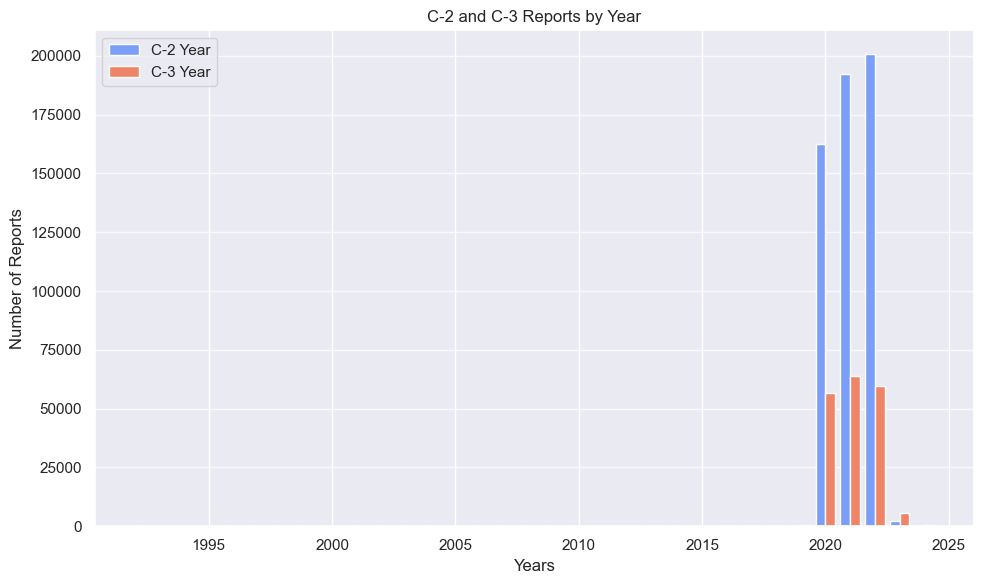

In [54]:
# Ensure 'C-2 Date' and 'C-3 Date' are in datetime format
df_train_temp['C-2 Date'] = pd.to_datetime(df_train_temp['C-2 Date'], errors='coerce')
df_train_temp['C-3 Date'] = pd.to_datetime(df_train_temp['C-3 Date'], errors='coerce')

# Count the occurrences of each year in 'C-2 Date' and 'C-3 Date'
C2_count = df_train_temp['C-2 Date'].dt.year.value_counts().sort_index()
C3_count = df_train_temp['C-3 Date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))


plt.bar(C2_count.index - 0.2, C2_count.values, width=0.4, color=sns.color_palette("coolwarm", as_cmap=True)(0.2), label='C-2 Year')
plt.bar(C3_count.index + 0.2, C3_count.values, width=0.4, color=sns.color_palette("coolwarm", as_cmap=True)(0.8), label='C-3 Year')


plt.title("C-2 and C-3 Reports by Year")
plt.xlabel("Years")
plt.ylabel("Number of Reports")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  
plt.show()


### Conclusion:
- The visualization shows that C-2 reporting is more consistent and frequent than C-3 reporting from 2020 onwards, with many few reports before 2020.
- This trend reflects that there has been a significant increase in reporting activity in recent years. We decided to examine the C-2 and C-3 time intervals up to the year of the accident and found that the median was very low, with a clustering of values around 0 to 10 days, suggesting that reports are being filled in very close to the time of the accident.
- This information will later help us to fill in missing values at the accident date due to their high relatedness.

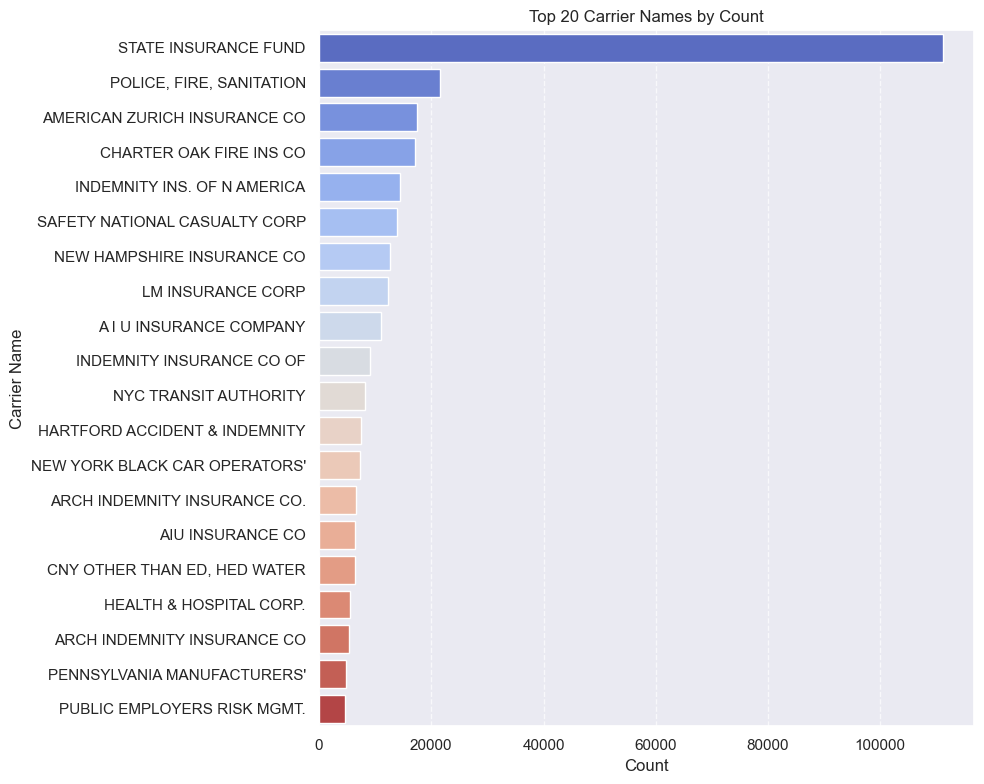

In [55]:
# Get the top 20 value counts for 'Carrier Name' in descending order
carrier_counts = df_train['Carrier Name'].value_counts().nlargest(20)

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot the top 20 value counts as a horizontal 
sns.barplot(y=carrier_counts.index, x=carrier_counts.values, palette="coolwarm")


plt.title("Top 20 Carrier Names by Count")
plt.xlabel("Count")
plt.ylabel("Carrier Name")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()  # Adjust layout for better readability
plt.show()


### Conclusion: 
- The distribution of “Carrier Name” is highly skewed, with a few carriers, notably “State Insurance Fund” and “Police, Fire, Sanitation,” accounting for the majority of occurrences.
- Many other carriers appear with much lower frequencies, which highlights a great deal of cardinality in this feature.

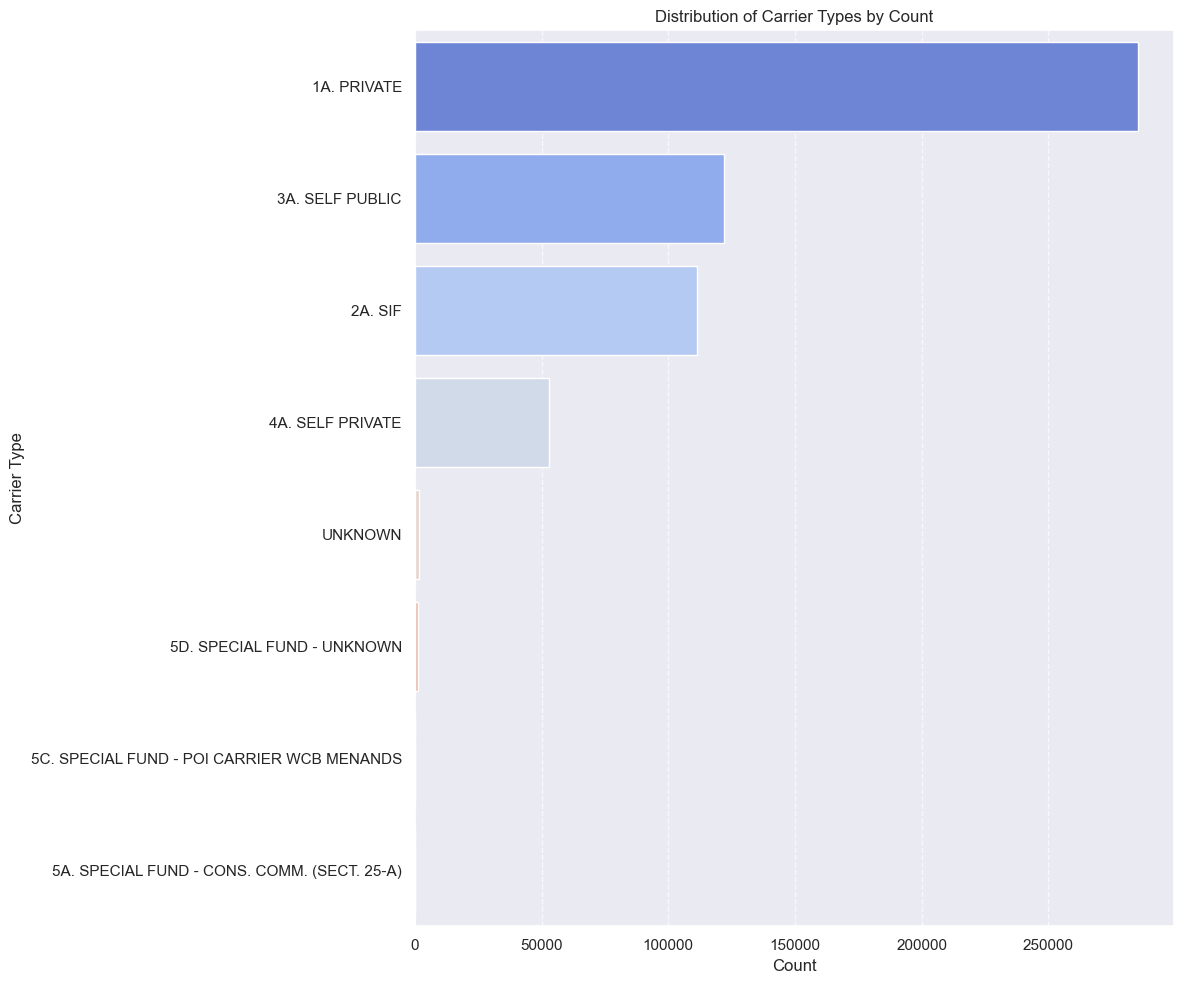

In [56]:
# Get the value counts for 'Carrier Type' in descending order
carrier_type_counts = df_train['Carrier Type'].value_counts()


plt.figure(figsize=(12, 10))

# Plot the value counts as a horizontal bar plot 
sns.barplot(y=carrier_type_counts.index, x=carrier_type_counts.values, palette="coolwarm")


plt.title("Distribution of Carrier Types by Count")
plt.xlabel("Count")
plt.ylabel("Carrier Type")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()  # Adjust layout for better readability
plt.show()


### Conclusion:
- Similarly, in the Distribution Of Carrier Types by Count, there is an extremely low frequency of cases in some categories of this feature.
- More insights can be drawn from the top four most selected options of this variable, such as Private Career types and Self Public, being, as expected, some of the most common.

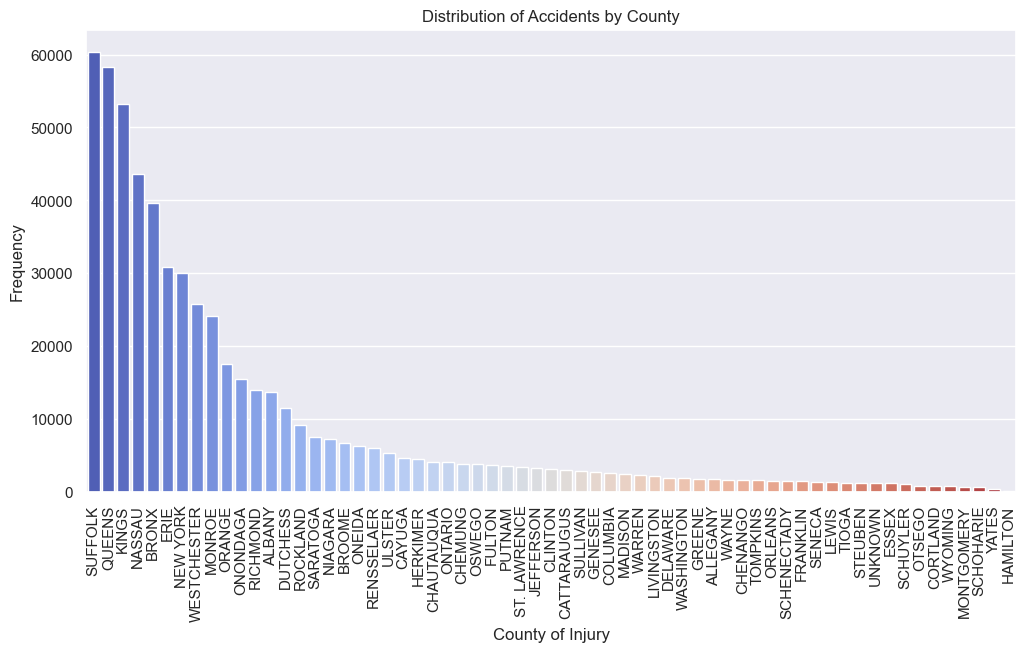

In [57]:
# Bar plot for 'County of Injury' with adjusted colors
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='County of Injury', order=df_train['County of Injury'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Distribution of Accidents by County')
plt.ylabel('Frequency')
plt.show()

### Conclusion:
**Long Tail Distribution:**
- The chart shows a clear long tail distribution, where a small number of counties (e.g., Suffolk, Queens, and Kings) account for a large number of accidents, while most counties have significantly lower frequencies.

**High Cardinality:**
- The distribution highlights a high cardinality situation, as there are many counties with varying levels of frequency. This can complicate modeling and analysis, especially if these variables are used directly.

**Geographic Disparity:**
- The concentration of accidents in a few counties may be related to factors such as higher population density, greater traffic volume, or higher levels of industrial or commercial activity in those areas.

**Counties with Low or Zero Frequency:**
- The tail of the distribution shows many counties with very low or near-zero frequencies, suggesting regions with low activity or underreporting of accidents.

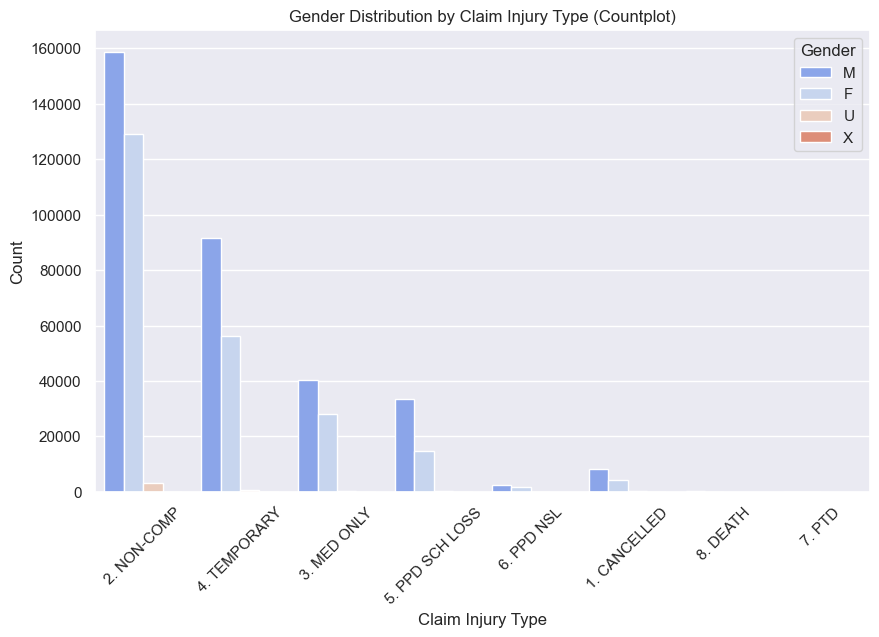

In [58]:
# Set the figure size to make the plot more readable
plt.figure(figsize=(10, 6))

# Create a count plot to display the distribution of Claim Injury Types by Gender
# 'x' specifies the Claim Injury Type, and 'hue' adds a color distinction based on Gender
# 'data' specifies the DataFrame source, and 'palette' sets the color scheme
sns.countplot(x='Claim Injury Type', hue='Gender', data=df_train, palette='coolwarm')


plt.title('Gender Distribution by Claim Injury Type (Countplot)')

# Label the x-axis to indicate the categories of injury claims
plt.xlabel('Claim Injury Type')

# Label the y-axis to indicate the count of occurrences
plt.ylabel('Count')

# Rotate x-axis labels to improve readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Conclusion:

**Overall Distribution by Gender:**
- The majority of cases are associated with the Male (M) gender, with significantly higher frequencies across all claim injury types compared to Female (F).
- Unknown or unspecified genders (U and X) appear in much smaller numbers.

**Comparison Across Claim Types:**
- For the claim type "3. MED ONLY", the proportion of Male and Female is relatively close.
- However, in claim type "5. PPD SCH LOSS", the number of cases associated with Male is more than double that of Female, showing a significant disparity.

**Gender Disparity:**
- Although the proportion between Male and Female varies across claim types, overall, males are more frequently associated with claim injury cases in all categories.

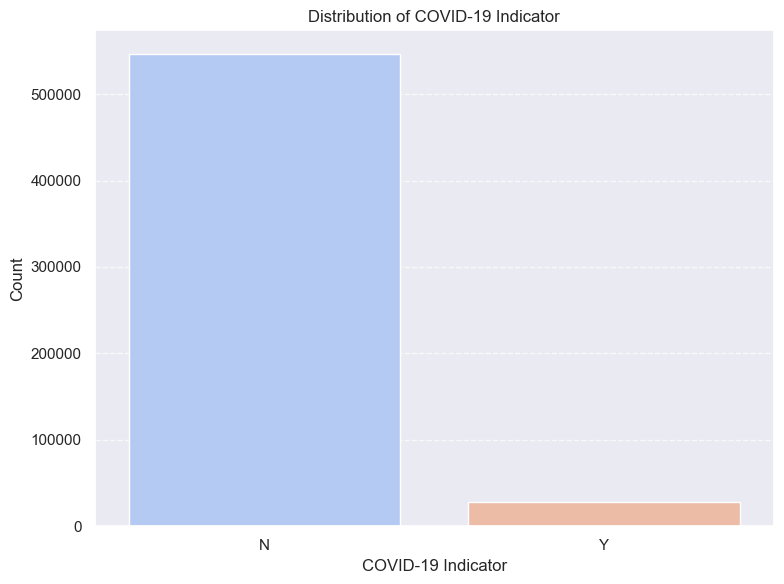

In [59]:
# Get the value counts for 'COVID-19 Indicator'
covid_indicator_counts = df_train['COVID-19 Indicator'].value_counts()

# Set up the plot
plt.figure(figsize=(8, 6))

# Plot the value counts as a bar plot 
sns.barplot(x=covid_indicator_counts.index, y=covid_indicator_counts.values, palette="coolwarm")


plt.title("Distribution of COVID-19 Indicator")
plt.xlabel("COVID-19 Indicator")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()  # Adjust layout for better readability
plt.show()


### Conclusion:
- Large majority of the dataset entries do not register positive for COVID-19, counting for more than 90%, Due to the high class imbalance of this feature, it will most likely not have a significant influence on the target variable, so the model will not learn much from it.

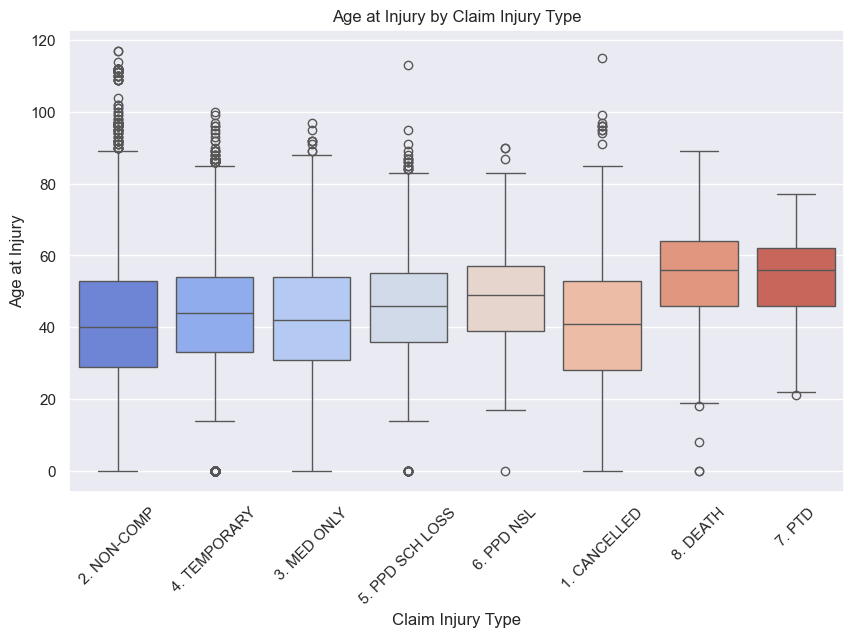

In [60]:
# Boxplot for 'Age at Injury' by 'Claim Injury Type'
plt.figure(figsize=(10, 6))

# Apply a color palette and rotate the labels
sns.boxplot(data=df_train, x='Claim Injury Type', y='Age at Injury', palette='coolwarm')


plt.title('Age at Injury by Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Age at Injury')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


plt.show()


### Conclusion:
- This box plot shows the distribution of “age at time of injury” among the different “claim types”, which reveals some consistent patterns. 
- For example, the majority of the injury types show a median age around 40-50 years, indicating that injuries affect a similar age range across the different claim types.
- More severe injuries, like “DEATH” and “PTD” (Permanent Total Disability), tend to affect older people, with a higher average age.
- The “TEMPORARY” and “PPD NSL” (Permanent Partial Disability with Unscheduled Loss) age categories present broader age ranges.
- In general, although injuries affect people of different ages, the most severe types of claims are associated with older age groups.

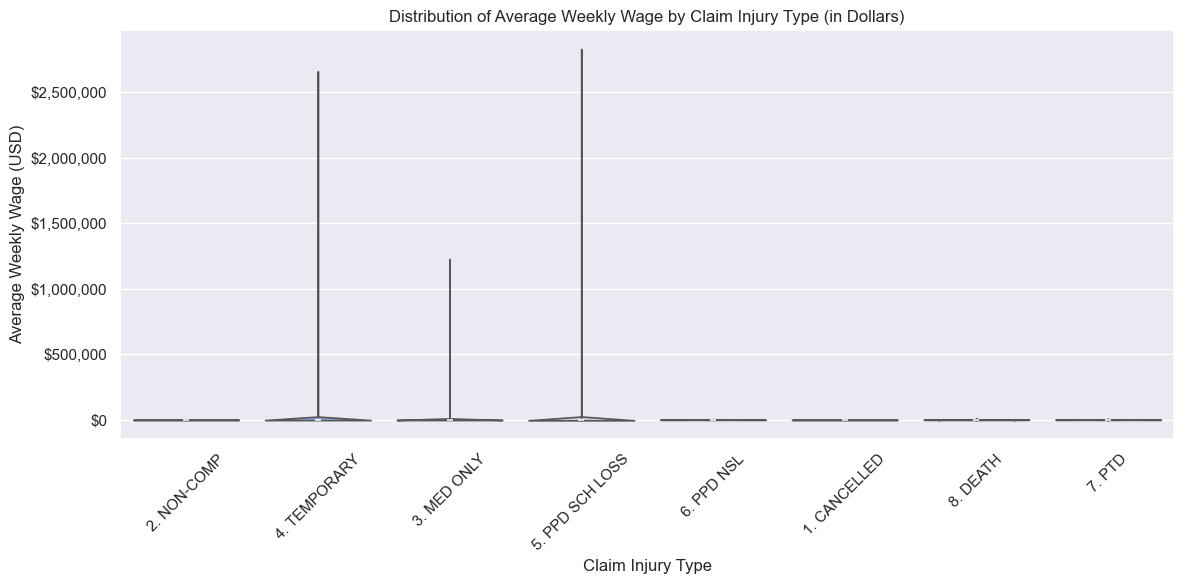

In [61]:
# Set up a larger figure size for better readability
plt.figure(figsize=(12, 6))

# Create a violin plot to show the distribution of 'Average Weekly Wage' for each 'Claim Injury Type'
# This time, no filtering is applied, so all data, including outliers, is shown
sns.violinplot(data=df_train, x='Claim Injury Type', y='Average Weekly Wage', palette="coolwarm")

# Add a title and axis labels for context and readability
plt.title('Distribution of Average Weekly Wage by Claim Injury Type (in Dollars)')
plt.xlabel('Claim Injury Type')
plt.ylabel('Average Weekly Wage (USD)')

# Format the y-axis to display values in dollars with thousand separators
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Rotate x-axis labels for better readability, especially for longer claim types
plt.xticks(rotation=45)

# Adjust layout to prevent overlap and improve spacing
plt.tight_layout()


plt.show()


### ​​Conclusion:
- The violin graph illustrates the distribution of average weekly salary among the different claim types.
- The “Temporary” and “Med Only” claim type show notably higher average wages, combined with a broader array of wage values, as we can see in the taller lines in the graph.
- We observed, therefore  that these claim types affect people with a broader income spectrum.
- In contrast, other types of claims, such as “ Non-compensatpry” and “Voided,” have lower average wages and narrower distributions, indicating a narrower wage range.
- In general, “Temporary” and “Med Only” claims do seem to involve higher and more variable weekly wages compared to other injury types.

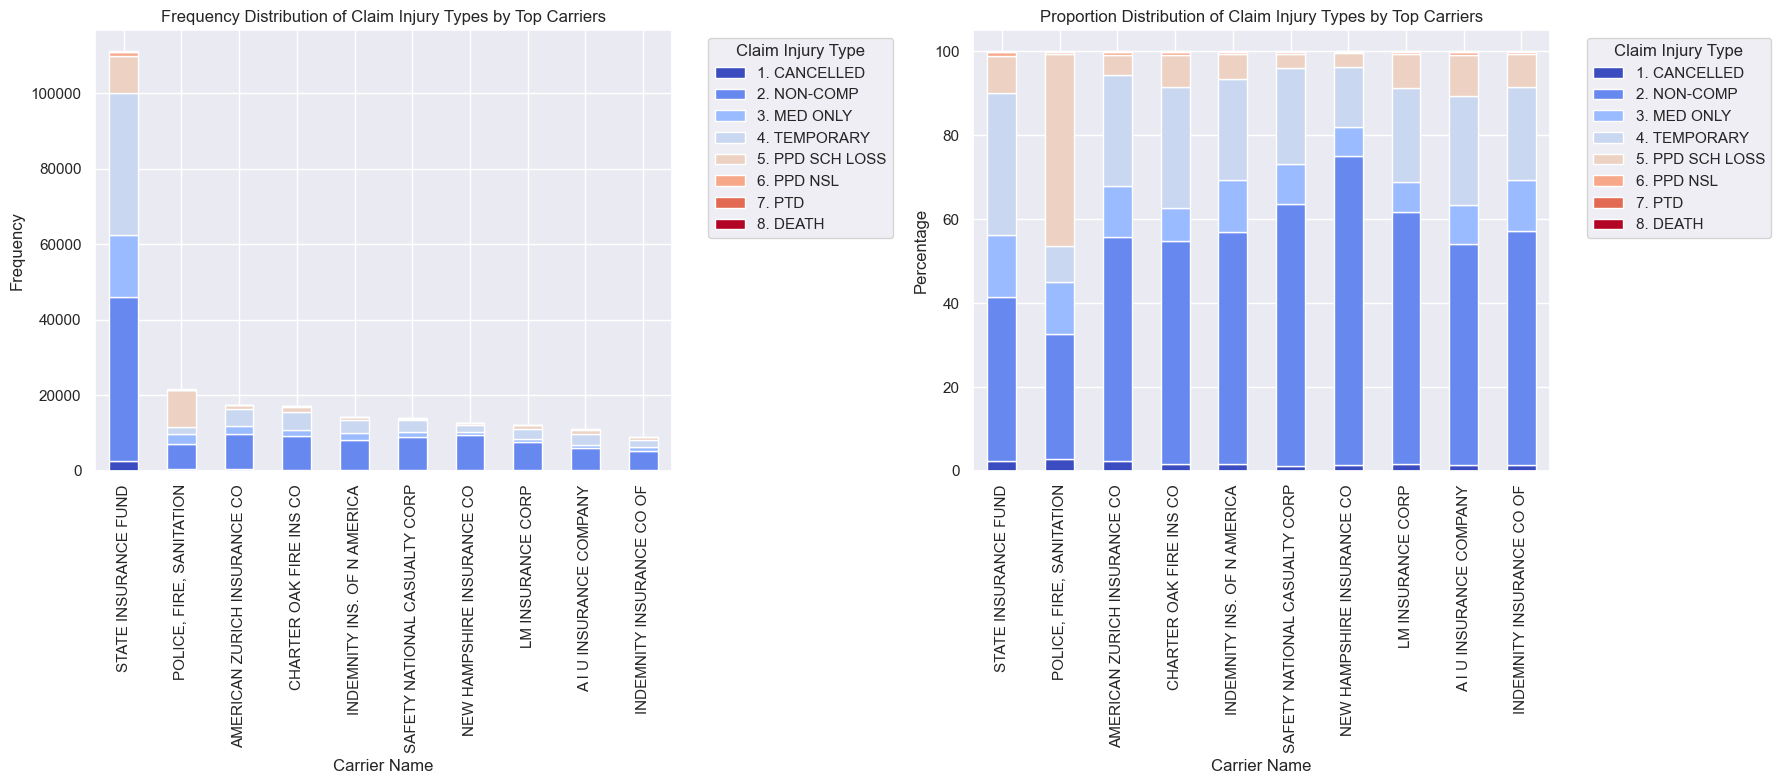

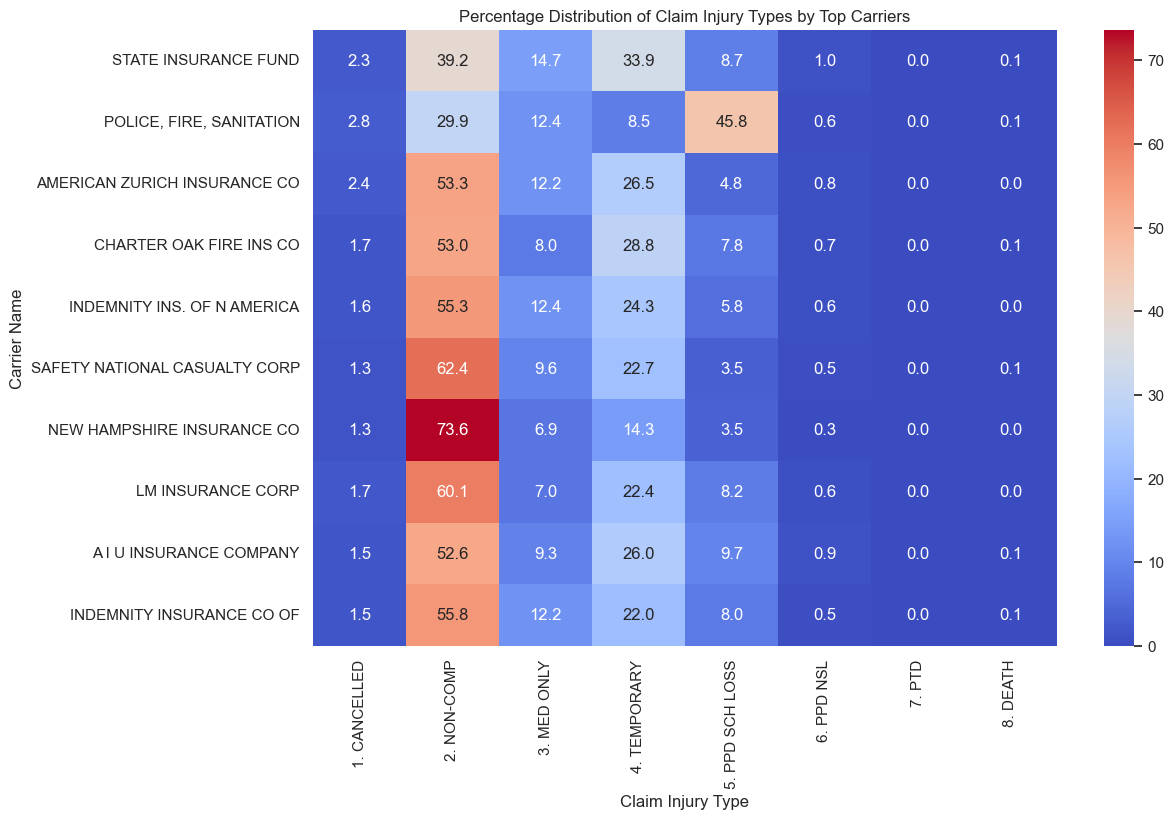

In [62]:
# Create a crosstab for 'Carrier Name' and 'Claim Injury Type' in df_train
carrier_claim_type_counts = pd.crosstab(df_train['Carrier Name'], df_train['Claim Injury Type'])

# Determine the top 10 carriers by frequency of claims
top_carriers = carrier_claim_type_counts.sum(axis=1).nlargest(10).index

# Filter the data to include only the top carriers
top_carrier_claim_type_counts = carrier_claim_type_counts.loc[top_carriers]

# Calculate the percentage distribution of claim types within each carrier
top_carrier_claim_type_percentage = top_carrier_claim_type_counts.div(top_carrier_claim_type_counts.sum(axis=1), axis=0) * 100

# Create subplots for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Stacked bar plot showing the absolute frequency distribution of Claim Injury Type
top_carrier_claim_type_counts.plot(kind='bar', stacked=True, colormap="coolwarm", ax=axes[0])
axes[0].set_title("Frequency Distribution of Claim Injury Types by Top Carriers")
axes[0].set_xlabel("Carrier Name")
axes[0].set_ylabel("Frequency")
axes[0].legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Stacked bar plot showing the normalized (proportion) distribution
top_carrier_claim_type_percentage.plot(kind='bar', stacked=True, colormap="coolwarm", ax=axes[1])
axes[1].set_title("Proportion Distribution of Claim Injury Types by Top Carriers")
axes[1].set_xlabel("Carrier Name")
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Heatmap for top carriers 
plt.figure(figsize=(12, 8))
sns.heatmap(top_carrier_claim_type_percentage, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Percentage Distribution of Claim Injury Types by Top Carriers")
plt.xlabel("Claim Injury Type")
plt.ylabel("Carrier Name")
plt.show()

### Conclusion:
- The graphs reveal that State Insurance Fund handles the largest volume of claims, with a particular focus on Non-Comp and Temporary injury types.
- Companies such as New Hampshire Insurance Co. and Safety National Casualty Corp. have a high proportion of Non-Comp claims, making up over 60% and 70% of their respective claims.
- In contrast, “Police, Fire, Sanitation” has a more varied distribution of claims, but the 45% in “PPD NSL” stands out.
- These patterns suggest that particular carriers may focus on specific types of injury claims, likely influenced by the nature of their policyholders and the types of coverage they offer.
- This will be valuable to understand for model building going forward.

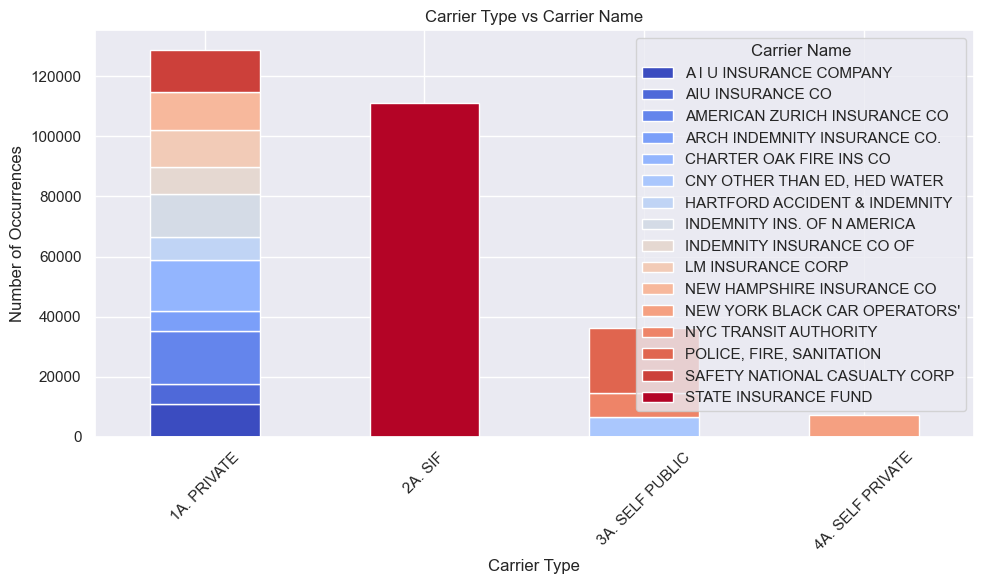

In [63]:
# Calculate percentage of each 'Carrier Name' in df_train
carrier_name_percentage = df_train["Carrier Name"].value_counts(normalize=True) * 100

# Filter for carrier names that are higher than 1%
filtered_carrier_names = carrier_name_percentage[carrier_name_percentage > 1].index
filtered_data = df_train[df_train["Carrier Name"].isin(filtered_carrier_names)]

# Create a crosstab of 'Carrier Type' and 'Carrier Name'
carrier_crosstab = pd.crosstab(filtered_data['Carrier Type'], filtered_data['Carrier Name'])

# Plot the crosstab 
plt.figure(figsize=(10, 6))
carrier_crosstab.plot(kind='bar', stacked=True, colormap="coolwarm", ax=plt.gca())  
plt.title('Carrier Type vs Carrier Name')
plt.xlabel('Carrier Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

### Conclusion:
- The bar chart illustrates the distribution of the types of insurance companies among the various carriers.
- The “2A SIF” (State Insurance Fund) company has the highest number of appearances, well above others.
- The “1A Private” companies also appear frequently, with contributions from multiple companies, such as “American Zurich Insurance Co” and “Charter Oak Fire Ins Co”.
- The categories “3A Public Self-Employed” and “4A Private Self-Employed” are much less frequent, with minimal representation from a few companies.
- These data reflect the importance of state and private insurers in the data set, with public and private insurers contributing a smaller share of claims.

## **1.7 Analysing multivariate relationships**

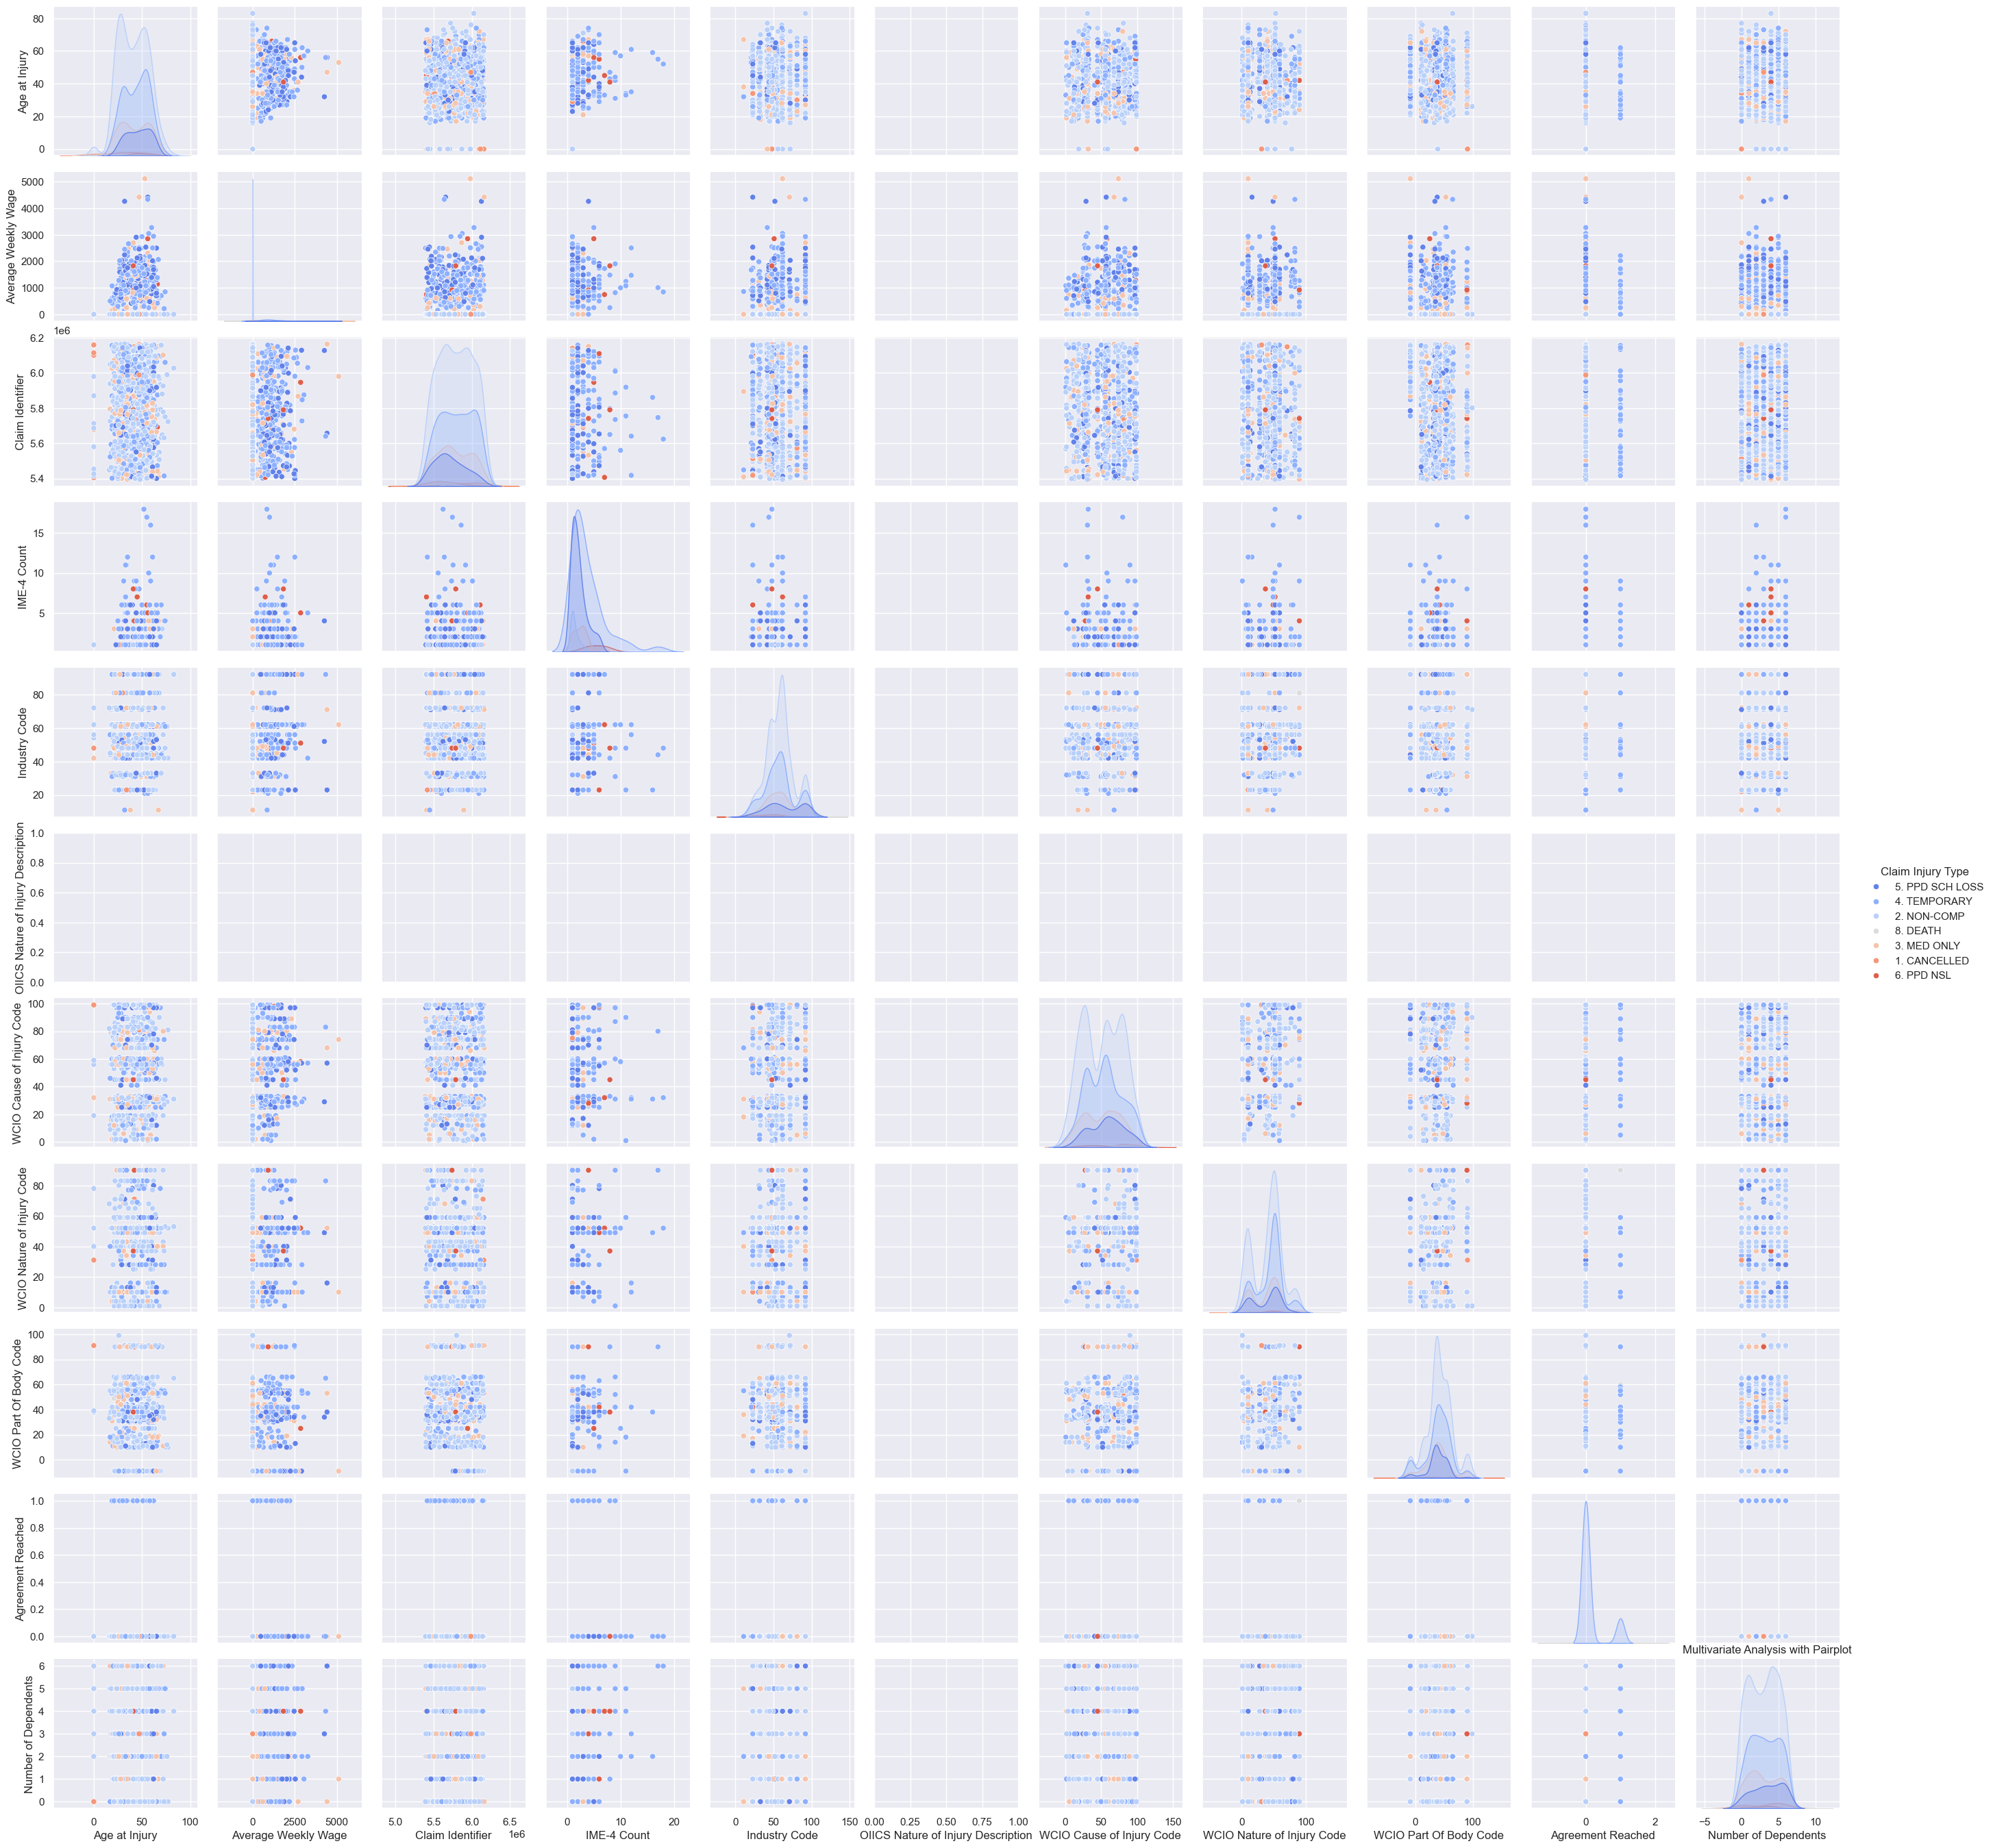

In [64]:
# Sampling 1000 random rows from DataFrame
df_sample = df_train.sample(1000, random_state=42)

# Create pairplot
sns.pairplot(df_sample, hue="Claim Injury Type", palette="coolwarm")
plt.title('Multivariate Analysis with Pairplot')
plt.show()


### Conclusions:
**Correlation Between Variables:**

- The chart shows a multivariate scatter plot analysis, where some variables exhibit visible patterns of correlation. **For example:**
The relationship between Age at Injury and Average Weekly Wage appears to show consistent dispersion without many extreme values.
- Categorical variables, such as Claim Injury Type, are color-coded, allowing observation of how they distribute in relation to numerical variables.

**Data Distribution:**
- The univariate distributions (diagonal plots) indicate the spread of individual variables. Some variables, like IME-4 Count, show distributions highly concentrated at low values.
- Variables like Age at Injury have a more uniform distribution, while others, such as Average Weekly Wage, display a long tail.

**Separation Between Categories:**
- The colors representing different Claim Injury Types help identify how these types behave in relation to numerical variables.
- For instance, certain types may be associated with specific ranges of Average Weekly Wage or Number of Dependents.

**Potential Outliers:**
- Some scatter plots highlight isolated points that may indicate outliers, especially for variables like Average Weekly Wage or WCIO Nature of Injury Code.

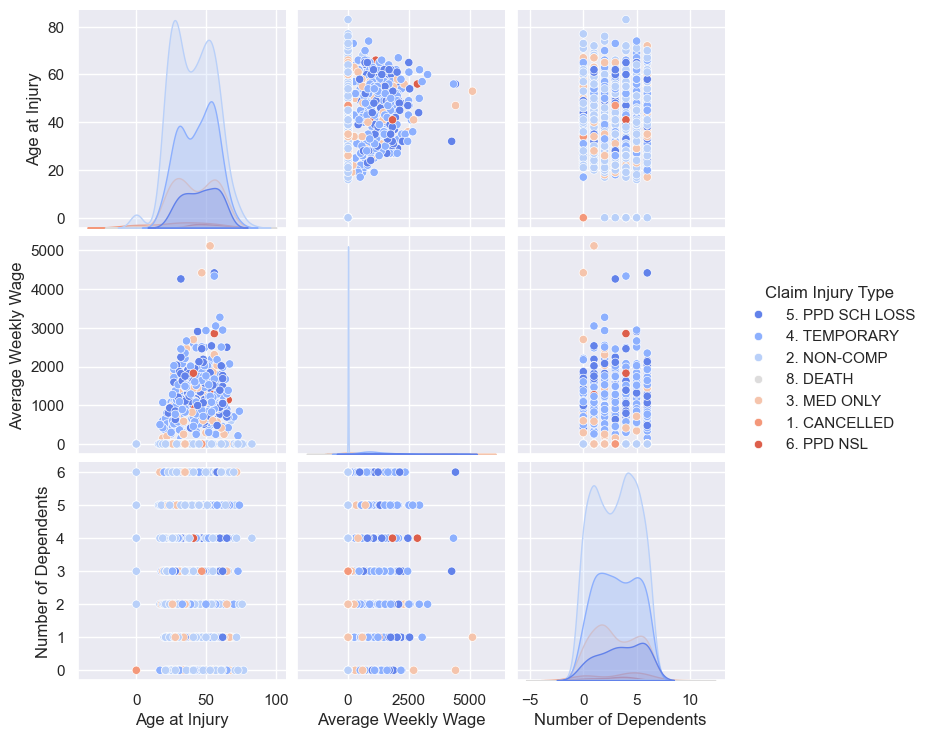

In [65]:
# Selecting only the most relevant variables
selected_columns = ['Age at Injury', 'Average Weekly Wage', 'Number of Dependents', 'Claim Injury Type']

# Create pairplot 
sns.pairplot(df_sample[selected_columns], hue="Claim Injury Type", palette="coolwarm")
plt.show()


### Conclusions:
**Univariate Variable Distributions:**
- Age at Injury shows a higher concentration of cases around the 30-40 age range, with fewer records for very young or older age groups.
- Average Weekly Wage exhibits a long tail, indicating that most weekly wages are concentrated at lower values, with some extreme outliers at very high wages.
- Number of Dependents has a discrete distribution, with most cases concentrated between 0 and 2 dependents.

**Correlation Between Variables:**
- There is no strong linear correlation evident between Age at Injury and Average Weekly Wage, but some patterns can be observed.
- **For example:**
- - Certain Claim Injury Type categories are associated with specific wage ranges.
- - The relationship between Number of Dependents and other variables is limited, but there may be a slight association between a higher number of dependents and slightly higher wages.

**Claim Injury Type Categories:**
- The colors representing Claim Injury Type categories reveal that some types are more associated with certain age and wage ranges.
- **For instance:**
- - PPD SCH LOSS appears more common in middle-aged groups and with higher average weekly wages.
- - TEMPORARY and NON-COMP show wider distribution across various age and wage ranges.

**Outliers and Notable Patterns:**
- There are outlier points in Average Weekly Wage, possibly indicating exceptional cases or data entry errors.
- Some specific categories (e.g., CANCELLED) have a more limited presence in the dataset.

## *1.8 Correlation Between Categorical Variables*

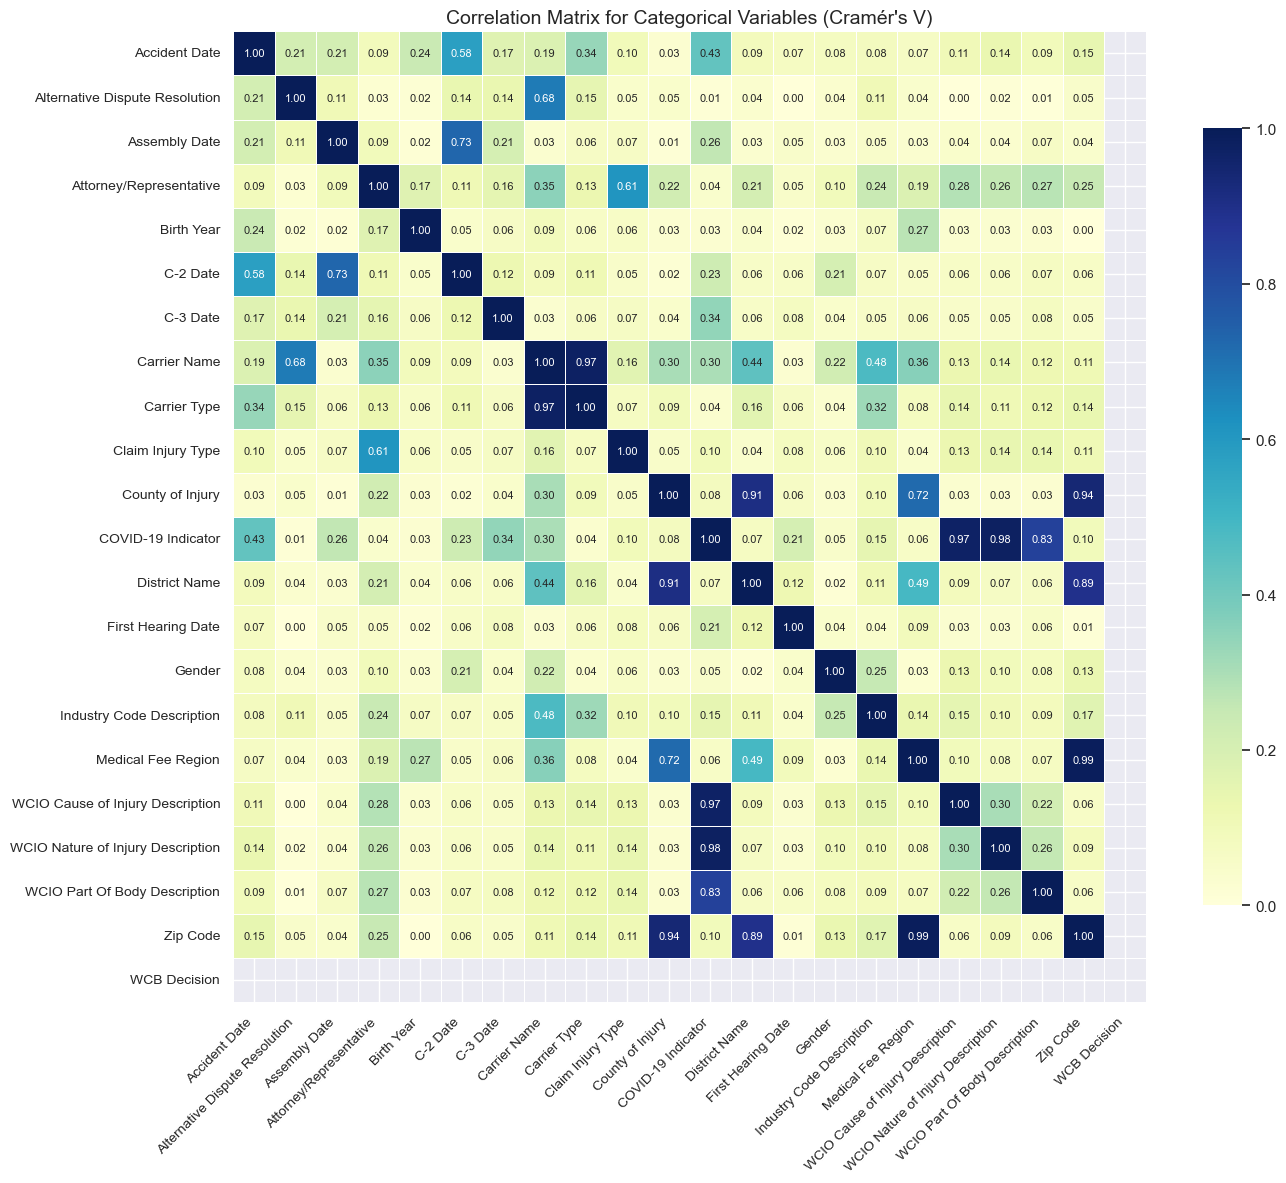

In [66]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select only the categorical columns which are all the ones that are not float or int
cat_cols = df_train.select_dtypes(exclude=['float64', 'int64']).columns

# Create a DataFrame with the categorical columns
X_train_cat = df_train[cat_cols]

# Create an empty DataFrame to store the Cramér's V values
cramers_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Calculate Cramér's V for each pair of categorical variables
for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(X_train_cat[col1], X_train_cat[col2])

# Convert the values to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the correlation matrix with improved readability
plt.figure(figsize=(14, 12))  
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap="YlGnBu",  
            linecolor='white', linewidths=0.5, cbar_kws={'shrink': .8},
            annot_kws={"size": 8})  

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)


plt.title("Correlation Matrix for Categorical Variables (Cramér's V)", fontsize=14)
plt.tight_layout()
plt.show()

### Conclusion:
**Strong Correlations:**
- The strongest relationships are observed between temporally related variables such as Accident Date, C-2 Date, and C-3 Date, indicating frequent associations between these dates.
- The variable Claim Injury Type shows a high correlation with Carrier Type and Carrier Name, suggesting that the type of claim is strongly influenced by the carrier's type or name.

**Moderate Associations:**
- The COVID-19 Indicator exhibits moderate correlations with variables like District Name and County of Injury, suggesting that the pandemic had a regional impact on incidents.
- Industry Code Description and Medical Fee Region display significant correlations, potentially indicating industry-specific patterns in medical fees.

**Weak or No Correlations:**
- Some variables, such as Gender, show very low correlation with other categories, suggesting minimal or no relationship.